Loading Packages

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

In [13]:
%matplotlib inline
plt.style.use('seaborn')

In [14]:
cd D:\STUDY\SEM-4\ML\Assignment-1

D:\STUDY\SEM-4\ML\Assignment-1


In [15]:
data = pd.read_csv('student-mat.csv',sep = ';')
df = data
ydata = (data['G3']>11.0).astype(int)
y_df = pd.DataFrame(ydata)
data = data.drop(['G1','G2','G3'], axis = 1)
#data.dtypes
obj_df = data.select_dtypes(include=['object']).copy()
#df_3 = pd.get_dummies(obj_df,columns=['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],drop_first = True)
#data = data.drop(['school','sex', 'address','famsize','Pstatus','dep','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], axis=1)
df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
df_5 = data.drop(obj_df.columns, axis = 1)
xdata = pd.concat([df_5,df_4],axis = 1)
#xdata = pd.concat([data,df_3],axis = 1)

Train and Test Data Split


In [16]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

Vizualising Target Variable Distribution

In [17]:
import seaborn as sns

In [80]:
#sns.lmplot( x="age", y="traveltime",data = xdata,fit_reg=False, hue=ydata, legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')

SVM

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  

In [19]:
def featurebuild(data,n):
    df = []
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    if len(df.dtypes[df.dtypes == 'object']) != 0:
        obj_df = df.select_dtypes(include=['object']).copy()
        df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
        df_5 = df.drop(obj_df.columns, axis = 1)
        df_6 = pd.concat([df_5,df_4],axis = 1)
        return df_6
    else:
        return df

In [20]:
def featurebuild_dt(data,n):
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    obj_df = df.select_dtypes(include=['object']).copy()
    for i in obj_df.columns:
        keys = df[i].unique()
        values = np.arange(len(keys))
        dictionary = dict(zip(keys, values))
        df[i] = df[i].map(dictionary)
    return df

Optimum number of variables - SVM(5-Fold Cross Validation)

In [21]:
scores = np.zeros((30,6))
kernel = ['linear','rbf','poly']
for j in range(30):
    dat = featurebuild(data,j)
    X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split( dat , ydata , test_size=0.33, random_state=42)
    for i in range(len(kernel)):
        #clf = svm.SVC(kernel=kernel[i])
        #score = cross_val_score(clf, dat, ydata, cv=5)
        svclassifier = SVC(kernel=kernel[i])  
        cv_results = cross_validate(svclassifier, dat, ydata, cv= 5, return_train_score=True)
        #print(cv_results['train_score'])
        #svclassifier.fit(X_svm_train, y_svm_train)
        #y_train_pred = svclassifier.predict(X_svm_train)
        #y_test_pred = svclassifier.predict(X_svm_test)
        #train_acc = (confusion_matrix(y_svm_train,y_train_pred).diagonal()[0]+confusion_matrix(y_svm_train,y_train_pred).diagonal()[1])/(confusion_matrix(y_svm_train,y_train_pred).flatten().sum())
        #test_acc = (confusion_matrix(y_svm_test,y_test_pred).diagonal()[0]+confusion_matrix(y_svm_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_svm_test,y_test_pred).flatten().sum())
        scores[j][i] = cv_results['train_score'].mean()
        scores[j][i+3] = cv_results['test_score'].mean()
#scores

In [22]:
ass= np.matrix(scores)

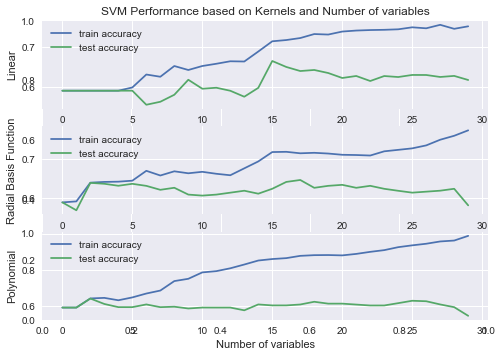

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xdist = np.arange(0,30,1)
ax1.plot(xdist,ass[:,0],label = 'train accuracy')
ax1.plot(xdist,ass[:,3],label = 'test accuracy')
ax1.legend(loc='upper left')
ax1.set_ylabel('Linear')
ax2.plot(xdist,ass[:,1],label = 'train accuracy')
ax2.plot(xdist,ass[:,4],label = 'test accuracy')
ax2.legend(loc='upper left')
ax2.set_ylabel('Radial Basis Function')
ax3.plot(xdist,ass[:,2],label = 'train accuracy')
ax3.plot(xdist,ass[:,5],label = 'test accuracy')
ax3.legend(loc='upper left')
ax3.set_ylabel('Polynomial')
ax3.set_xlabel('Number of variables')
ax.set_title('SVM Performance based on Kernels and Number of variables')
plt.show()

Train dataset size and performance

In [94]:
box_svm= np.zeros((5,3))
a = [10,25,50,75,100]
for i in range(len(a)):
    X_train_cut = X_train[:int((X_train.shape[0])*a[i]/100)]
    y_train_cut = y_train[:int((y_train.shape[0])*a[i]/100)]
    svclassifier = SVC(kernel='linear') 
    svclassifier.fit(X_train_cut,y_train_cut)
    y_cut_pred = svclassifier.predict(X_train_cut)
    y_test_pred = svclassifier.predict(X_test)
    train_acc = (confusion_matrix(y_train_cut,y_cut_pred).diagonal()[0]+confusion_matrix(y_train_cut,y_cut_pred).diagonal()[1])/(confusion_matrix(y_train_cut,y_cut_pred).flatten().sum())
    test_acc = (confusion_matrix(y_test,y_test_pred).diagonal()[0]+confusion_matrix(y_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_test,y_test_pred).flatten().sum())
    box_svm[i][0] = a[i]
    box_svm[i][1] = train_acc
    box_svm[i][2] = test_acc   

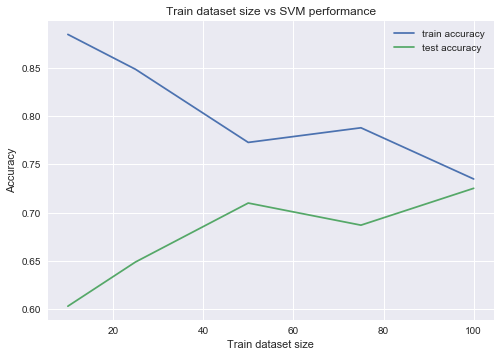

In [95]:
fig_2 =plt.figure()
ax = fig_2.add_subplot(111)
ax.plot(box_svm[:,0],box_svm[:,1],label = 'train accuracy')
ax.plot(box_svm[:,0],box_svm[:,2],label = 'test accuracy')
ax.legend(loc='upper right')
ax.set_title('Train dataset size vs SVM performance')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train dataset size')
plt.show()

Decision Trees

In [ ]:
#from sklearn.ensemble import 

In [24]:
dt_y = ydata
dt_x = featurebuild_dt(data,28)
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split( dt_x , dt_y , test_size=0.33, random_state=42)

In [25]:
pd.unique(ydata)

array([0, 1], dtype=int64)

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import io
from scipy import misc
import pydot
from IPython.display import Image
from sklearn.metrics import accuracy_score

In [27]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_dt_train, y_dt_train)
y_dt_train_pred=clf_gini.predict(X_dt_train)
y_dt_test_pred=clf_gini.predict(X_dt_test)
accuracy_train= accuracy_score(y_dt_train,y_dt_train_pred)
accuracy_test = accuracy_score(y_dt_test,y_dt_test_pred)
[accuracy_train,accuracy_test]

[0.6856060606060606, 0.6106870229007634]

Optimum number of variables - Decision Trees(5-Fold Cross Validation)

In [28]:
scores = np.zeros((29,8))
depth = [None,2,4,6]
for j in range(29):
    dat_dt= featurebuild_dt(data,j)
    for i in range(len(depth)):
        #clf = svm.SVC(kernel=kernel[i])
        #score = cross_val_score(clf, dat, ydata, cv=5)
        clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=depth[i], min_samples_leaf=5)   
        cv_results = cross_validate(clf_gini, dat_dt, ydata, cv= 5, return_train_score=True)
        #print(cv_results['train_score'])
        #svclassifier.fit(X_svm_train, y_svm_train)
        #y_train_pred = svclassifier.predict(X_svm_train)
        #y_test_pred = svclassifier.predict(X_svm_test)
        #train_acc = (confusion_matrix(y_svm_train,y_train_pred).diagonal()[0]+confusion_matrix(y_svm_train,y_train_pred).diagonal()[1])/(confusion_matrix(y_svm_train,y_train_pred).flatten().sum())
        #test_acc = (confusion_matrix(y_svm_test,y_test_pred).diagonal()[0]+confusion_matrix(y_svm_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_svm_test,y_test_pred).flatten().sum())
        scores[j][i] = cv_results['train_score'].mean()
        scores[j][i+4] = cv_results['test_score'].mean()

In [29]:
ass= np.matrix(scores)

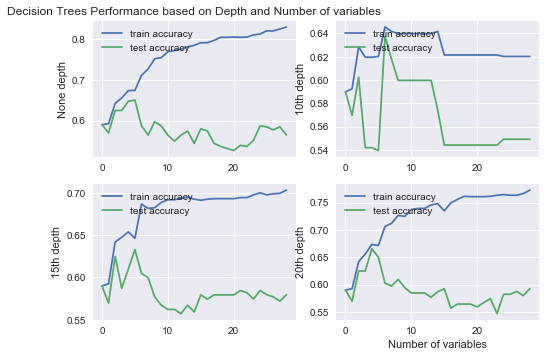

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
xdist = np.arange(0,29,1)
ax1.plot(xdist,ass[:,0],label = 'train accuracy')
ax1.plot(xdist,ass[:,4],label = 'test accuracy')
ax1.legend(loc='upper left')
ax1.set_ylabel('None depth')
ax2.plot(xdist,ass[:,1],label = 'train accuracy')
ax2.plot(xdist,ass[:,5],label = 'test accuracy')
ax2.legend(loc='upper left')
ax2.set_ylabel('10th depth')
ax3.plot(xdist,ass[:,2],label = 'train accuracy')
ax3.plot(xdist,ass[:,6],label = 'test accuracy')
ax3.legend(loc='upper left')
ax3.set_ylabel('15th depth')
ax4.plot(xdist,ass[:,3],label = 'train accuracy')
ax4.plot(xdist,ass[:,7],label = 'test accuracy')
ax4.legend(loc='upper left')
ax4.set_ylabel('20th depth')
ax4.set_xlabel('Number of variables')
ax1.set_title('Decision Trees Performance based on Depth and Number of variables')
plt.show()

Train dataset size and performance

In [ ]:
dat_dt = featurebuild_dt(data,j)
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split( dat , ydata , test_size=0.33, random_state=42)

In [100]:
box_dt = np.zeros((5,3))
a = [10,25,50,75,100]
for i in range(len(a)):
    X_dt_train_cut = X_dt_train[:int((X_train.shape[0])*a[i]/100)]
    y_dt_train_cut = y_dt_train[:int((y_train.shape[0])*a[i]/100)]
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
    clf_gini.fit(X_dt_train_cut,y_dt_train_cut)
    y_dt_train_pred = clf_gini.predict(X_dt_train_cut)
    y_dt_test_pred = clf_gini.predict(X_dt_test)
    train_acc = (confusion_matrix(y_dt_train_cut,y_dt_train_pred).diagonal()[0]+confusion_matrix(y_dt_train_cut,y_dt_train_pred).diagonal()[1])/(confusion_matrix(y_dt_train_cut,y_dt_train_pred).flatten().sum())
    test_acc = (confusion_matrix(y_dt_test,y_dt_test_pred).diagonal()[0]+confusion_matrix(y_dt_test,y_dt_test_pred).diagonal()[1])/(confusion_matrix(y_dt_test,y_dt_test_pred).flatten().sum())
    box_dt[i][0] = a[i]
    box_dt[i][1] = train_acc
    box_dt[i][2] = test_acc   

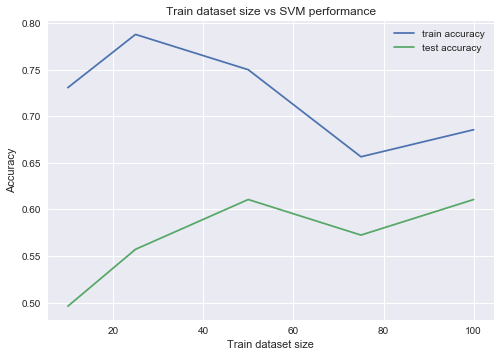

In [101]:
fig_6 = plt.figure() 
ax = fig_6.add_subplot(111)
ax.plot(box_dt[:,0],box_dt[:,1],label = 'train accuracy')
ax.plot(box_dt[:,0],box_dt[:,2],label = 'test accuracy')
ax.legend(loc='upper right')
ax.set_title('Train dataset size vs SVM performance')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train dataset size')
plt.show()

In [78]:
def plot_tree(tree,feature_names,classnames,plot_title):
    graph_data = export_graphviz(tree,feature_names=feature_names,class_names=classnames,filled=True,rounded=True,out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [148]:
#feature_names = X_dt_train.columns
#classnames = pd.unique(ydata)
#title= 'work'
#plot_tree(clf_gini,feature_names,classnames,title)

In [239]:
def show_tree(data, features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file =f,feature_names = features)
    pydotplus.graph_from_dot_data(dot_data.getvalue())
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [149]:
#dot_data = io.StringIO()
#tree.export_graphviz(dt,out_file = dot_data,feature_names = features,filled =True, rounded =True,special_characters = True)
#pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [150]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']
#show_tree(dt,features,'dec_tree_01.png')

In [153]:
#graph = Source(tree.export_graphviz(clf_gini, out_file=None
  # , feature_names=labels, class_names=['0', '1', '2'] 
  # , filled = True))

#display(SVG(graph.pipe(format='svg')))

Boosting Decision Tree

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [126]:
X_ada_train, X_ada_test, y_ada_train, y_ada_test = train_test_split( data , ydata , test_size=0.33, random_state=42)
for label in data.columns:
    data[label] = LabelEncoder().fit(data[label]).transform(data[label])
    
X = data
Y = ydata
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)
#AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
cv_ada_results = cross_validate(AdaBoost, X, Y, cv= 5, return_train_score=True)
[cv_ada_results['train_score'].mean(),cv_ada_results['test_score'].mean()]
#print('The accuracy is: ',prediction*100,'%')

[0.7930303116734455, 0.6074797143784486]

Tuning AdaBoost - Max Depth and Number of base learners

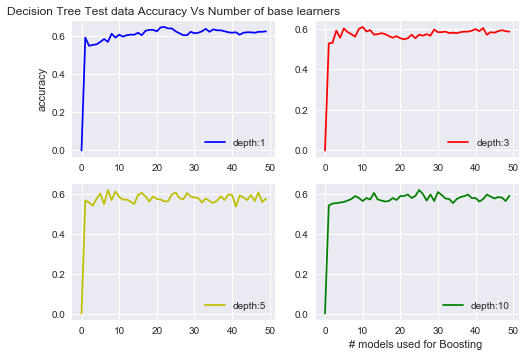

In [154]:
number_of_base_learners = 50
model_accuracy=np.zeros((50,5))
depth = [1,3,5,10,15]
fig0 =  plt.figure()
ax0 = fig0.add_subplot(221)
ax1 = fig0.add_subplot(222)
ax2 = fig0.add_subplot(223)
ax3 = fig0.add_subplot(224)
X = data
Y = ydata
for i in range(1,number_of_base_learners):
    for j in range(len(depth)):
        model = DecisionTreeClassifier(criterion='gini',max_depth=depth[j])
        AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=i,learning_rate=1)
        #AdaBoost.fit(X,Y)
        cv_ada_results = cross_validate(AdaBoost, X, Y, cv= 5, return_train_score=True)
        prediction = cv_ada_results['test_score'].mean()
        model_accuracy[i][j] = prediction  
ax0.plot(range(len(model_accuracy)),model_accuracy[:,0],'b',label = 'depth:1')
ax1.plot(range(len(model_accuracy)),model_accuracy[:,1],'r',label = 'depth:3')
ax2.plot(range(len(model_accuracy)),model_accuracy[:,2],'y',label = 'depth:5')
ax3.plot(range(len(model_accuracy)),model_accuracy[:,3],'g',label = 'depth:10')
ax3.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
ax0.legend(loc='lower right')
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax3.legend(loc='lower right')
ax0.set_title('Decision Tree Test data Accuracy Vs Number of base learners')
#print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model_accuracy[-1]*100,'%')    
plt.show()        